**Mandatory tasks to be performed on assigned COVID19 **
 
**1. Cleaning the dataset**
<br>
We are cleaning the dataset as per following:
*  Calculating the daily values (considering the values are cumulative).
*  Removing the negative values obtained (as a negative value in this dataset won't make sense).
*  Applying Tukey's rule to figure out the outliers in all four columns (SC confirmed, SD confirmed, SC deaths, SD deaths)
*  Removing the obtained outliers from the data

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
# from google.colab import drive
# drive.mount('/content/gdrive')

Loading the 21.csv dataset

In [3]:
# %cd '/content/gdrive/MyDrive/probstats_project/'
data_cumulative = pd.read_csv('21.csv')
data_cumulative["Date"] = pd.to_datetime(data_cumulative["Date"])

Here, we first parse the data to calculate the daily number from the cumulative one and create 4 dataframes, one for each in (SC confirmed, SD confirmed, SC deaths, SD deaths).
Then we check in all the four datasets whether there are any negative values in the dataset, if present, we remove them (as negative values don't make sense in this dataset).

In [4]:
# create day wise data
data = data_cumulative.copy()
idx_to_be_deleted_1 = set()
idx_to_be_deleted_2 = set()
idx_to_be_deleted_3 = set()
idx_to_be_deleted_4 = set()
for i in range(1, len(data_cumulative)):
    data.loc[i, 'SC confirmed'] = data_cumulative.loc[i, 'SC confirmed'] - data_cumulative.loc[i - 1, 'SC confirmed']
    if data.loc[i, 'SC confirmed'] < 0:
        idx_to_be_deleted_1.add(i)
    data.loc[i, 'SD confirmed'] = data_cumulative.loc[i, 'SD confirmed'] - data_cumulative.loc[i - 1, 'SD confirmed']
    if data.loc[i, 'SD confirmed'] < 0:
        idx_to_be_deleted_2.add(i)
    data.loc[i, 'SC deaths'] = data_cumulative.loc[i, 'SC deaths'] - data_cumulative.loc[i - 1, 'SC deaths']
    if data.loc[i, 'SC deaths'] < 0:
        idx_to_be_deleted_3.add(i)
    data.loc[i, 'SD deaths'] = data_cumulative.loc[i, 'SD deaths'] - data_cumulative.loc[i - 1, 'SD deaths']
    if data.loc[i, 'SD deaths'] < 0:
        idx_to_be_deleted_4.add(i)

sc_conf_per_day = data.copy()
sd_conf_per_day = data.copy()
sc_death_per_day = data.copy()
sd_death_per_day = data.copy()

print("Negative values for SC confirmed at index", idx_to_be_deleted_4)
sc_conf_per_day.drop(list(idx_to_be_deleted_1), 0, inplace=True)
print("Negative values for SD confirmed at index", idx_to_be_deleted_4)
sd_conf_per_day.drop(list(idx_to_be_deleted_2), 0, inplace=True)
print("Negative values for SC deaths at index", idx_to_be_deleted_4)
sc_death_per_day.drop(list(idx_to_be_deleted_3), 0, inplace=True)
print("Negative values for SD deaths at index", idx_to_be_deleted_4)
sd_death_per_day.drop(list(idx_to_be_deleted_4), 0, inplace=True)

sc_conf_per_day = sc_conf_per_day.loc[:, ['Date', 'SC confirmed']]
sd_conf_per_day = sd_conf_per_day.loc[:, ['Date', 'SD confirmed']]
sc_death_per_day = sc_death_per_day.loc[:, ['Date', 'SC deaths']]
sd_death_per_day = sd_death_per_day.loc[:, ['Date', 'SD deaths']]

Negative values for SC confirmed at index {376}
Negative values for SD confirmed at index {376}
Negative values for SC deaths at index {376}
Negative values for SD deaths at index {376}


In [5]:
idx_to_be_deleted_1.clear()
idx_to_be_deleted_2.clear()
idx_to_be_deleted_3.clear()
idx_to_be_deleted_4.clear()

This method caluclates the lower and upper value for the outlier detection using Tukey's rule with alpha = 1.5.

In [6]:
def get_outlier_range(data):
    n = len(data)
    print("min =", data[0], "max =", data[n - 1])
    alpha = 1.5
    
    data.sort()
    q1 = math.ceil(0.25 * n) # 1st quartile (25%)
    print("Q1 at", q1, "value =", data[q1 - 1])
    q3 = math.ceil(0.75 * n) # 3rd quartile (75%)
    print("Q3 at", q3, "value =", data[q3 - 1])
    
    iqr = data[q3 - 1] - data[q1 - 1] # Inter quartile range
    print("IQR =", iqr)
    
    tmp = iqr * alpha
    
    s = data[q1 - 1] - tmp
    l = data[q3 - 1] + tmp
    print("Range: [", s, ",", l, "]")
    
    return s, l

This method gives the indexes considered to be outliers

In [7]:
def get_outlier_rows(data, idx_to_be_deleted):
    s, l = get_outlier_range(data.copy())
    for i in range(len(data)):
        if (data[i] < s or data[i] > l) and data[i] != 0:
            idx_to_be_deleted.add(i)


In [8]:
print("\nApplying Tukey's for SC confirmed")
get_outlier_rows(sc_conf_per_day.loc[:, "SC confirmed"].values, idx_to_be_deleted_1)
print("No. of outliers in SC confirmed", len(idx_to_be_deleted_1))
print("\nApplying Tukey's for SD confirmed")
get_outlier_rows(sd_conf_per_day.loc[:, "SD confirmed"].values, idx_to_be_deleted_2)
print("No. of outliers in SD confirmed", len(idx_to_be_deleted_2))
print("\nApplying Tukey's for SC deaths")
get_outlier_rows(sc_death_per_day.loc[:, "SC deaths"].values, idx_to_be_deleted_3)
print("No. of outliers in SC deaths", len(idx_to_be_deleted_3))
print("\nApplying Tukey's for SD deaths")
get_outlier_rows(sd_death_per_day.loc[:, "SD deaths"].values, idx_to_be_deleted_4)
print("No. of outliers in SD deaths", len(idx_to_be_deleted_4))
print("\n")


Applying Tukey's for SC confirmed
min = 0 max = 1241
Q1 at 110 value = 158
Q3 at 329 value = 1703
IQR = 1545
Range: [ -2159.5 , 4020.5 ]
No. of outliers in SC confirmed 27

Applying Tukey's for SD confirmed
min = 0 max = 182
Q1 at 109 value = 35
Q3 at 327 value = 321
IQR = 286
Range: [ -394.0 , 750.0 ]
No. of outliers in SD confirmed 52

Applying Tukey's for SC deaths
min = 0 max = 16
Q1 at 110 value = 3
Q3 at 329 value = 30
IQR = 27
Range: [ -37.5 , 70.5 ]
No. of outliers in SC deaths 22

Applying Tukey's for SD deaths
min = 0 max = 0
Q1 at 110 value = 0
Q3 at 328 value = 4
IQR = 4
Range: [ -6.0 , 10.0 ]
No. of outliers in SD deaths 57




Here we now create 4 new dataframes to store the outlier removed data.
We do this because we may need to use the non outlier removed data in some cases in the following question.

In [9]:
sc_conf_per_day_tukey = sc_conf_per_day.copy()
sd_conf_per_day_tukey = sd_conf_per_day.copy()
sc_death_per_day_tukey = sc_death_per_day.copy()
sd_death_per_day_tukey = sd_death_per_day.copy()

In [10]:
sc_conf_per_day_tukey.drop(list(idx_to_be_deleted_1), 0, inplace=True)
sd_conf_per_day_tukey.drop(list(idx_to_be_deleted_2), 0, inplace=True)
sc_death_per_day_tukey.drop(list(idx_to_be_deleted_3), 0, inplace=True)
sd_death_per_day_tukey.drop(list(idx_to_be_deleted_4), 0, inplace=True)

**2. Solution of required inferences for the COVID19 dataset**

**a. Prediction of the COVID19 fatality and #cases for the fourth week in August 2020 using:**<br>
(i) AR(3), (ii) AR(5), (iii) EWMA with alpha = 0.5, and (iv) EWMA with alpha = 0.8.

A plotting function is created to plot predictions and actual data for the last week

In [11]:
def plotpred(x, act, prd,data):
    plt.plot(x,act,label="Actual")
    plt.plot(x,prd,label="Predictions")
    plt.xlabel('Day')
    plt.ylabel(data)
    plt.legend(loc='upper left')
    plt.show()

We obtain outlier free data for August. The code is dynamic in a way that if any data is removed being an outlier, it won't be used in training and testing. We had observed that only a few data from training(2020-08-01 to 2020-08-21) has been removed and none of the test data(2020-08-22 to 2020-08-28) are outlier. We have used np.searchsorted to find the location of the data in our outlier free dataset. If it is not found, its expected location is returned.

In [12]:
sc_conf_per_day_np = np.array(sc_conf_per_day_tukey)
sd_conf_per_day_np = np.array(sd_conf_per_day_tukey)
sc_death_per_day_np = np.array(sc_death_per_day_tukey)
sd_death_per_day_np = np.array(sd_death_per_day_tukey)

Data set is prepared using below two functions. These give us the training and testing data for performing AR(3) predictions.

In [13]:
def prepare_train_3(X_W,col=1):
  z1 = np.array(pd.to_datetime('2020-08-01'))
  z2 = np.array(pd.to_datetime('2020-08-19'))
  l2  = np.searchsorted(X_W[:,0], z1 , side='left')
  l1 = np.searchsorted(X_W[:,0], z2 , side='left')
  AR3_train_X = np.empty((l1-l2,3))
  AR3_train_Y = np.empty(l1-l2)
  for i in range(l2,l1):
    AR3_train_X[i-l2][0] = int(X_W[i][col])
    AR3_train_X[i-l2][1] = int(X_W[i+1][col])
    AR3_train_X[i-l2][2] = int(X_W[i+2][col])
    AR3_train_Y[i-l2] = int(X_W[i+3][col])
  return AR3_train_X,AR3_train_Y
def prepare_test_3(X_W,col=1):
  z1 = np.array(pd.to_datetime('2020-08-19'))
  z2 = np.array(pd.to_datetime('2020-08-26'))
  l2  = np.searchsorted(X_W[:,0], z1 , side='left')
  l1 = np.searchsorted(X_W[:,0], z2 , side='left')
  AR3_test_X = np.empty((l1-l2,3))
  AR3_test_Y = np.empty(l1-l2)
  for i in range(l2,l1):
    AR3_test_X[i-l2][0] = int(X_W[i][col])
    AR3_test_X[i-l2][1] = int(X_W[i+1][col])
    AR3_test_X[i-l2][2] = int(X_W[i+2][col])
    AR3_test_Y[i-l2] = int(X_W[i+3][col])
  return AR3_test_X,AR3_test_Y

AR(3) is a multiple linear regression problem on 3 features. These features are the actual data for previous 3 days. As discussed in class, we predict for a given date and for the next day, we train again appending the given date data into the training set. The function below prints the prediction and actual data, plot of the prediction and actual data and returns MAPE and MSE.<br>
For MAPE we have ignored the case where Ytest is 0.

In [14]:
def perform_multiple_linear_regression_AR3(X_train, Y_train, X_test, Y_test,data):
    Y_test_preds = []
    bias_add = np.full((X_train.shape[0], 1), 1)
    X_train = np.concatenate(( X_train,bias_add), axis=1)
    bias_add = np.full((X_test.shape[0], 1), 1)
    X_test = np.concatenate(( X_test,bias_add), axis=1)
    for i in range(len(Y_test)):
      X_train_t = np.transpose(X_train)
      B_ols = np.linalg.inv(X_train_t @ X_train) @ X_train_t @ Y_train
      append_data = [[X_train[len(X_train)-1][1], X_train[len(X_train)-1][2], X_test[i][2],1]]
      append_data = np.array(append_data)
      Y_test_preds.append(B_ols@X_test[i])
      X_train = np.concatenate((X_train,append_data))
      Y_train = np.insert(Y_train, len(Y_train), Y_test[i])
    Y_test_preds = np.array(Y_test_preds)
    print("Prediction for the last week:")
    for i in range(len(Y_test_preds)):
      print("Day:",i+1,"Predicted:",Y_test_preds[i],"Actual:",Y_test[i])
    plotpred([1,2,3,4,5,6,7],Y_test,Y_test_preds,data)
    Errs = Y_test_preds - Y_test
    se = (Errs)**2
    MAPE = 0
    nonzeros = 0
    for i in range(len(Y_test)):
      if Y_test[i] != 0:
        nonzeros = nonzeros+1
        MAPE += (np.abs(Errs[i])/Y_test[i])
    MAPE = (MAPE/nonzeros)*100
    return B_ols, np.mean(se), np.mean(MAPE)

Below code performs AR(3) predictions of fatality and #cases on outlier free datasets of two states SC and SD.

AR3


SC_Confirmed
Prediction for the last week:
Day: 1 Predicted: 805.0757397163095 Actual: 917.0
Day: 2 Predicted: 928.9400582979968 Actual: 693.0
Day: 3 Predicted: 997.9100270472802 Actual: 563.0
Day: 4 Predicted: 867.6472168594476 Actual: 937.0
Day: 5 Predicted: 733.5176399402033 Actual: 605.0
Day: 6 Predicted: 694.737113009947 Actual: 505.0
Day: 7 Predicted: 853.3546487026254 Actual: 1353.0


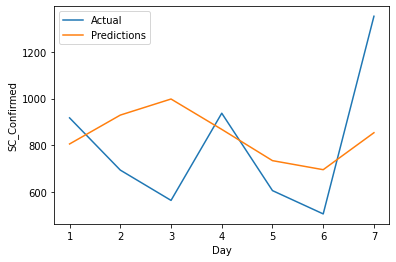

MSE:  80616.2463153637
MAPE:  32.37784420131962

SD_Confirmed
Prediction for the last week:
Day: 1 Predicted: 127.80854425620224 Actual: 251.0
Day: 2 Predicted: 246.62368348361002 Actual: 141.0
Day: 3 Predicted: 133.32340291959872 Actual: 149.0
Day: 4 Predicted: 130.204739511291 Actual: 80.0
Day: 5 Predicted: 99.0277981743755 Actual: 66.0
Day: 6 Predicted: 74.58323283893556 Actual: 623.0
Day: 7 Predicted: 149.6420343394985 Actual: 323.0


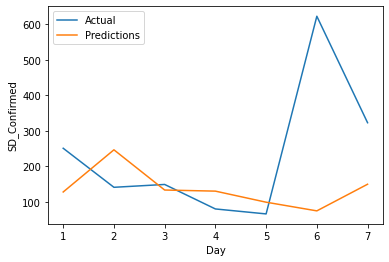

MSE:  51571.93415141825
MAPE:  55.57278490572245

SC_Death
Prediction for the last week:
Day: 1 Predicted: 21.94285538355135 Actual: 34.0
Day: 2 Predicted: 31.391305853409772 Actual: 11.0
Day: 3 Predicted: 43.69323994198038 Actual: 7.0
Day: 4 Predicted: 39.13179109627689 Actual: 18.0
Day: 5 Predicted: 29.72899846198899 Actual: 44.0
Day: 6 Predicted: 28.902358791379235 Actual: 55.0
Day: 7 Predicted: 25.258592884782953 Actual: 27.0


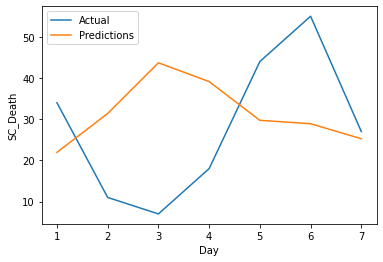

MSE:  463.1296290540619
MAPE:  135.53709805550048

SD_Death
Prediction for the last week:
Day: 1 Predicted: 1.7562525742166457 Actual: 0.0
Day: 2 Predicted: 0.43176225521053924 Actual: 2.0
Day: 3 Predicted: 1.2172685157275298 Actual: 0.0
Day: 4 Predicted: 1.824906907402064 Actual: 0.0
Day: 5 Predicted: 0.5840518043443199 Actual: 1.0
Day: 6 Predicted: 1.6536187074115214 Actual: 0.0
Day: 7 Predicted: 1.2083941827917735 Actual: 3.0


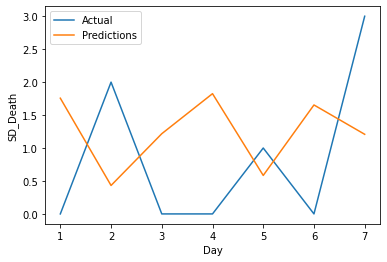

MSE:  2.3533056748450174
MAPE:  59.90896690399398


In [15]:
print("AR3")
print("================\n")
print("\nSC_Confirmed")
print("================")
SC_Confirmed_train_X,SC_Confirmed_train_Y = prepare_train_3(sc_conf_per_day_np)
SC_Confirmed_test_X, SC_Confirmed_test_Y = prepare_test_3(sc_conf_per_day_np)
dd, mse, mape = perform_multiple_linear_regression_AR3(SC_Confirmed_train_X,SC_Confirmed_train_Y,SC_Confirmed_test_X,SC_Confirmed_test_Y,"SC_Confirmed")
print("MSE: ", mse)
print("MAPE: ", mape)

print("\nSD_Confirmed")
print("================")
SD_Confirmed_train_X,SD_Confirmed_train_Y = prepare_train_3(sd_conf_per_day_np)
SD_Confirmed_test_X, SD_Confirmed_test_Y = prepare_test_3(sd_conf_per_day_np)
dd, mse,mape = perform_multiple_linear_regression_AR3(SD_Confirmed_train_X,SD_Confirmed_train_Y,SD_Confirmed_test_X,SD_Confirmed_test_Y,"SD_Confirmed")
print("MSE: ", mse)
print("MAPE: ", mape)

print("\nSC_Death")
print("================")
SC_death_train_X,SC_death_train_Y = prepare_train_3(sc_death_per_day_np)
SC_death_test_X, SC_death_test_Y = prepare_test_3(sc_death_per_day_np)
dd, mse,mape = perform_multiple_linear_regression_AR3(SC_death_train_X,SC_death_train_Y,SC_death_test_X,SC_death_test_Y,"SC_Death")
print("MSE: ", mse)
print("MAPE: ", mape)

print("\nSD_Death")
print("================")
SD_death_train_X,SD_death_train_Y = prepare_train_3(sd_death_per_day_np)
SD_death_test_X, SD_death_test_Y = prepare_test_3(sd_death_per_day_np)
dd, mse,mape = perform_multiple_linear_regression_AR3(SD_death_train_X,SD_death_train_Y,SD_death_test_X,SD_death_test_Y,"SD_Death")
print("MSE: ", mse)
print("MAPE: ", mape)

We obtain outlier free data for August. The code is dynamic in a way that if any data is removed being an outlier, it won't be used in training and testing. We had observed that only a few data from training(2020-08-01 to 2020-08-21) has been removed and none of the test data(2020-08-22 to 2020-08-28) are outlier. We have used np.searchsorted to find the location of the data in our outlier free dataset. If it is not found, its expected location is returned.

In [16]:
def prepare_train_5(X_W,col=1):
  z1 = np.array(pd.to_datetime('2020-08-01'))
  z2 = np.array(pd.to_datetime('2020-08-17'))
  l2  = np.searchsorted(X_W[:,0], z1 , side='left')
  l1 = np.searchsorted(X_W[:,0], z2 , side='left')
  AR5_train_X = np.empty((l1-l2,5))
  AR5_train_Y = np.empty(l1-l2)
  for i in range(l2,l1):
    AR5_train_X[i-l2][0] = int(X_W[i][col])
    AR5_train_X[i-l2][1] = int(X_W[i+1][col])
    AR5_train_X[i-l2][2] = int(X_W[i+2][col])
    AR5_train_X[i-l2][3] = int(X_W[i+3][col])
    AR5_train_X[i-l2][4] = int(X_W[i+4][col])
    AR5_train_Y[i-l2] = int(X_W[i+5][col])
  return AR5_train_X,AR5_train_Y
def prepare_test_5(X_W,col=1):
  z1 = np.array(pd.to_datetime('2020-08-17'))
  z2 = np.array(pd.to_datetime('2020-08-24'))
  l2  = np.searchsorted(X_W[:,0], z1 , side='left')
  l1 = np.searchsorted(X_W[:,0], z2 , side='left')
  AR5_test_X = np.empty((l1-l2,5))
  AR5_test_Y = np.empty(l1-l2)
  for i in range(l2,l1):
    AR5_test_X[i-l2][0] = int(X_W[i][col])
    AR5_test_X[i-l2][1] = int(X_W[i+1][col])
    AR5_test_X[i-l2][2] = int(X_W[i+2][col])
    AR5_test_X[i-l2][3] = int(X_W[i+3][col])
    AR5_test_X[i-l2][4] = int(X_W[i+4][col])
    AR5_test_Y[i-l2] = int(X_W[i+5][col])
  return AR5_test_X,AR5_test_Y

AR(5) is a multiple linear regression problem on 5 features. These features are the actual data for previous 5 days. As discussed in class, we predict for a given date and for the next day, we train again appending the given date data into the training set. The function below prints the prediction and actual data, plot of the prediction and actual data and returns MAPE and MSE.
<br>
For MAPE we have ignored the case where Ytest is 0.

In [17]:
def perform_multiple_linear_regression_AR5(X_train, Y_train, X_test, Y_test,data):
    Y_test_preds = []
    bias_add = np.full((X_train.shape[0], 1), 1)
    X_train = np.concatenate(( X_train,bias_add), axis=1)
    bias_add = np.full((X_test.shape[0], 1), 1)
    X_test = np.concatenate(( X_test,bias_add), axis=1)
    for i in range(len(Y_test)):
      X_train_t = np.transpose(X_train)
      B_ols = np.linalg.inv(X_train_t @ X_train) @ X_train_t @ Y_train
      append_data = [[X_train[len(X_train)-1][1], X_train[len(X_train)-1][2],X_train[len(X_train)-1][3],X_train[len(X_train)-1][4], X_test[i][4],1]]
      append_data = np.array(append_data)
      Y_test_preds.append(B_ols@X_test[i])
      X_train = np.concatenate((X_train,append_data))
      Y_train = np.insert(Y_train, len(Y_train), Y_test[i])
    Y_test_preds = np.array(Y_test_preds)
    print("Prediction for the last week:")
    for i in range(len(Y_test_preds)):
      print("Day:",i+1,"Predicted:",Y_test_preds[i],"Actual:",Y_test[i])
    plotpred([1,2,3,4,5,6,7],Y_test,Y_test_preds,data)
    Errs = Y_test_preds - Y_test
    se = (Errs)**2
    MAPE = 0
    nonzeros = 0
    for i in range(len(Y_test)):
      if Y_test[i] != 0:
        nonzeros = nonzeros+1
        MAPE += (np.abs(Errs[i])/Y_test[i])
    MAPE = (MAPE/nonzeros)*100
    return B_ols, np.mean(se), np.mean(MAPE)

Below code performs AR(5) predictions of fatality and #cases on outlier free datasets of two states SC and SD.

AR5


SC_Confirmed
Prediction for the last week:
Day: 1 Predicted: 815.9497007167279 Actual: 917.0
Day: 2 Predicted: 951.3970725444517 Actual: 693.0
Day: 3 Predicted: 1019.2669579229051 Actual: 563.0
Day: 4 Predicted: 890.5723159360225 Actual: 937.0
Day: 5 Predicted: 718.3986223814272 Actual: 605.0
Day: 6 Predicted: 679.948574923412 Actual: 505.0
Day: 7 Predicted: 839.6420919420583 Actual: 1353.0


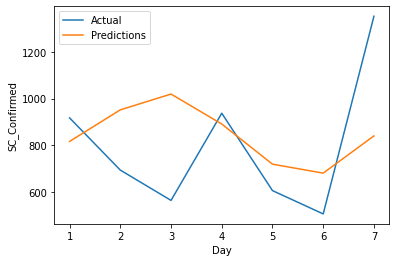

MSE:  84902.55285941607
MAPE:  32.233209416527444

SD_Confirmed
Prediction for the last week:
Day: 1 Predicted: 122.08847231625066 Actual: 251.0
Day: 2 Predicted: 245.76141516856703 Actual: 141.0
Day: 3 Predicted: 151.30939704772442 Actual: 149.0
Day: 4 Predicted: 113.83089346650932 Actual: 80.0
Day: 5 Predicted: 81.74513389543947 Actual: 66.0
Day: 6 Predicted: 117.1549134396127 Actual: 623.0
Day: 7 Predicted: 444.5563540959079 Actual: 323.0


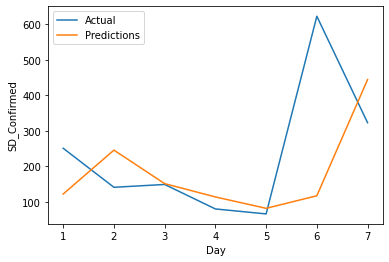

MSE:  42806.58668644372
MAPE:  44.59734938979336

SC_Death
Prediction for the last week:
Day: 1 Predicted: 7.879740284820798 Actual: 34.0
Day: 2 Predicted: 36.33704017358941 Actual: 11.0
Day: 3 Predicted: 31.635143875698542 Actual: 7.0
Day: 4 Predicted: 16.750899267061296 Actual: 18.0
Day: 5 Predicted: 29.713031269835938 Actual: 44.0
Day: 6 Predicted: 46.77400440718777 Actual: 55.0
Day: 7 Predicted: 40.74697718565555 Actual: 27.0


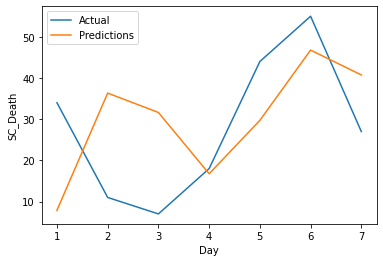

MSE:  341.9211427852112
MAPE:  109.19608098013637

SD_Death
Prediction for the last week:
Day: 1 Predicted: 1.404280316596469 Actual: 0.0
Day: 2 Predicted: 0.4590079487531795 Actual: 2.0
Day: 3 Predicted: 0.14300406488845518 Actual: 0.0
Day: 4 Predicted: 1.6781034775532966 Actual: 0.0
Day: 5 Predicted: 1.5694323478523167 Actual: 1.0
Day: 6 Predicted: 0.12358640713631186 Actual: 0.0
Day: 7 Predicted: 2.106224503090285 Actual: 3.0


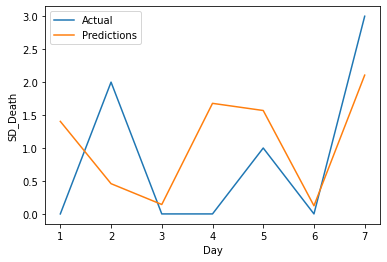

MSE:  1.1887860844604174
MAPE:  54.595117970409945


In [18]:
print("AR5")
print("================\n")

print("\nSC_Confirmed")
print("================")
SC_Confirmed_train_X,SC_Confirmed_train_Y = prepare_train_5(sc_conf_per_day_np)
SC_Confirmed_test_X, SC_Confirmed_test_Y = prepare_test_5(sc_conf_per_day_np)
dd, mse, mape = perform_multiple_linear_regression_AR5(SC_Confirmed_train_X,SC_Confirmed_train_Y,SC_Confirmed_test_X,SC_Confirmed_test_Y,"SC_Confirmed")
print("MSE: ", mse)
print("MAPE: ", mape)

print("\nSD_Confirmed")
print("================")
SD_Confirmed_train_X,SD_Confirmed_train_Y = prepare_train_5(sd_conf_per_day_np)
SD_Confirmed_test_X, SD_Confirmed_test_Y = prepare_test_5(sd_conf_per_day_np)
dd, mse,mape = perform_multiple_linear_regression_AR5(SD_Confirmed_train_X,SD_Confirmed_train_Y,SD_Confirmed_test_X,SD_Confirmed_test_Y,"SD_Confirmed")
print("MSE: ", mse)
print("MAPE: ", mape)

print("\nSC_Death")
print("================")
SC_death_train_X,SC_death_train_Y = prepare_train_5(sc_death_per_day_np)
SC_death_test_X, SC_death_test_Y = prepare_test_5(sc_death_per_day_np)
dd, mse,mape = perform_multiple_linear_regression_AR5(SC_death_train_X,SC_death_train_Y,SC_death_test_X,SC_death_test_Y,"SC_Death")
print("MSE: ", mse)
print("MAPE: ", mape)

print("\nSD_Death")
print("================")
SD_death_train_X,SD_death_train_Y = prepare_train_5(sd_death_per_day_np)
SD_death_test_X, SD_death_test_Y = prepare_test_5(sd_death_per_day_np)
dd, mse,mape = perform_multiple_linear_regression_AR5(SD_death_train_X,SD_death_train_Y,SD_death_test_X,SD_death_test_Y,"SD_Death")
print("MSE: ", mse)
print("MAPE: ", mape)

EWMA is performed on the outlier free dataset. The predictions with its plots, MSE and MAPE is printed along.

In [19]:
def perform_ewma(ind,X_W, indc, col=1, alpha=0.5):
    if(ind==indc):
      return int(X_W[:,col][ind])
    return alpha*int(X_W[:,col][ind-1]) + (1-alpha)*perform_ewma(ind-1,X_W,indc, col, alpha)


In [20]:
def perform_ewma_set(X_W,data,alpha = 0.5):
  z1 = np.array(pd.to_datetime('2020-08-01'))
  z2 = np.array(pd.to_datetime('2020-08-22'))
  z3 = np.array(pd.to_datetime('2020-08-29'))
  l0 = np.searchsorted(X_W[:,0], z1 , side='left')
  l1  = np.searchsorted(X_W[:,0], z2 , side='left')
  l2 = np.searchsorted(X_W[:,0], z3 , side='left')
  y_hat = np.empty(l2-l0)
  res = np.empty(l2-l1)
  for j in range(y_hat.shape[0]):
    y_hat[j] = perform_ewma(j+l0, X_W,l0,alpha = alpha)
    if(j>=l1-l0):
      print("Day:",j-l1+l0+1,": Predicted:", y_hat[j],"Actual:", X_W[j+l0][1])
      res[j-l1+l0] = y_hat[j] - int(X_W[j+l0][1])
  print("\n")
  plotpred([1,2,3,4,5,6,7],X_W[l1:l2,1].astype(int),y_hat[l1-l0:],data)
  print("mse:", np.mean(res**2))
  MAPE = 0
  nonzeros = 0
  for i in range(len(res)):
    if int(X_W[i+l1][1]) != 0:
      nonzeros = nonzeros+1
      MAPE += (np.abs(res[i])/int(X_W[i+l1][1]))
  MAPE = MAPE/nonzeros*100
  print("MAPE:", MAPE) 
  print("\n")

EWMA
Alpha = 0.5

SC_Confirmed
Day: 1 : Predicted: 931.9483604431152 Actual: 917
Day: 2 : Predicted: 924.4741802215576 Actual: 693
Day: 3 : Predicted: 808.7370901107788 Actual: 563
Day: 4 : Predicted: 685.8685450553894 Actual: 937
Day: 5 : Predicted: 811.4342725276947 Actual: 605
Day: 6 : Predicted: 708.2171362638474 Actual: 505
Day: 7 : Predicted: 606.6085681319237 Actual: 1353




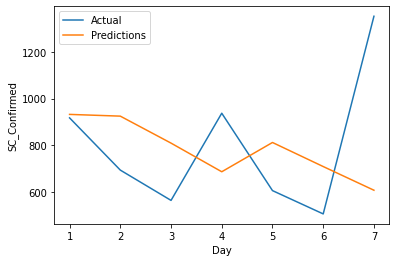

mse: 116895.70823132632
MAPE: 33.57276978782585


SD_Confirmed
Day: 1 : Predicted: 154.99390125274658 Actual: 251
Day: 2 : Predicted: 202.9969506263733 Actual: 141
Day: 3 : Predicted: 171.99847531318665 Actual: 149
Day: 4 : Predicted: 160.49923765659332 Actual: 80
Day: 5 : Predicted: 120.24961882829666 Actual: 66
Day: 6 : Predicted: 93.12480941414833 Actual: 623
Day: 7 : Predicted: 358.06240470707417 Actual: 323




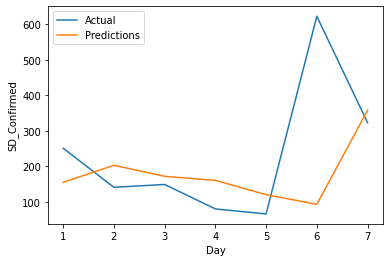

mse: 43572.85156841586
MAPE: 53.76885700120019


SC_Death
Day: 1 : Predicted: 46.12293243408203 Actual: 34
Day: 2 : Predicted: 40.061466217041016 Actual: 11
Day: 3 : Predicted: 25.530733108520508 Actual: 7
Day: 4 : Predicted: 16.265366554260254 Actual: 18
Day: 5 : Predicted: 17.132683277130127 Actual: 44
Day: 6 : Predicted: 30.566341638565063 Actual: 55
Day: 7 : Predicted: 42.78317081928253 Actual: 27




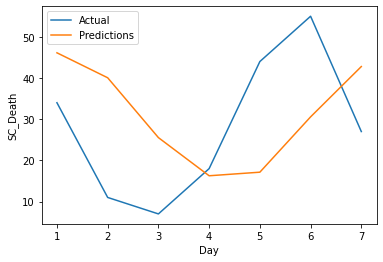

mse: 415.1280260195436
MAPE: 105.45079247026297


SD_Death
Day: 1 : Predicted: 1.730759620666504 Actual: 0
Day: 2 : Predicted: 0.865379810333252 Actual: 2
Day: 3 : Predicted: 1.432689905166626 Actual: 0
Day: 4 : Predicted: 0.716344952583313 Actual: 0
Day: 5 : Predicted: 0.3581724762916565 Actual: 1
Day: 6 : Predicted: 0.6790862381458282 Actual: 0
Day: 7 : Predicted: 0.3395431190729141 Actual: 3




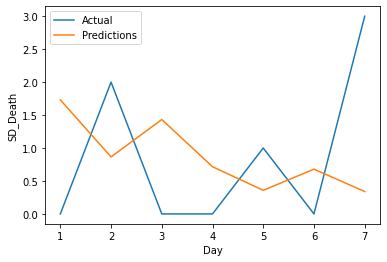

mse: 2.1142533998697037
MAPE: 69.86521929502487




In [21]:
print("EWMA\nAlpha = 0.5")
print("================\n")
print("SC_Confirmed")
print("=============")
perform_ewma_set(sc_conf_per_day_np,"SC_Confirmed")
print("SD_Confirmed")
print("=============")
perform_ewma_set(sd_conf_per_day_np,"SD_Confirmed")
print("SC_Death")
print("=============")
perform_ewma_set(sc_death_per_day_np,"SC_Death")
print("SD_Death")
print("=============")
perform_ewma_set(sd_death_per_day_np,"SD_Death")

EWMA
Alpha = 0.8

SC_Confirmed
Day: 1 : Predicted: 1020.894389580629 Actual: 917
Day: 2 : Predicted: 937.7788779161258 Actual: 693
Day: 3 : Predicted: 741.9557755832251 Actual: 563
Day: 4 : Predicted: 598.7911551166451 Actual: 937
Day: 5 : Predicted: 869.358231023329 Actual: 605
Day: 6 : Predicted: 657.8716462046658 Actual: 505
Day: 7 : Predicted: 535.5743292409331 Actual: 1353




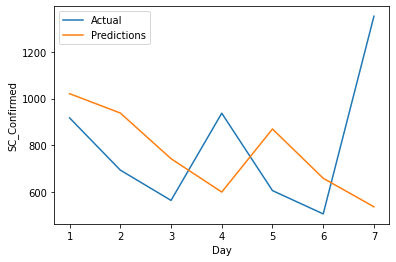

mse: 139794.41105302208
MAPE: 35.5593411767599


SD_Confirmed
Day: 1 : Predicted: 179.02354454127214 Actual: 251
Day: 2 : Predicted: 236.60470890825442 Actual: 141
Day: 3 : Predicted: 160.12094178165088 Actual: 149
Day: 4 : Predicted: 151.22418835633016 Actual: 80
Day: 5 : Predicted: 94.24483767126603 Actual: 66
Day: 6 : Predicted: 71.6489675342532 Actual: 623
Day: 7 : Predicted: 512.7297935068507 Actual: 323




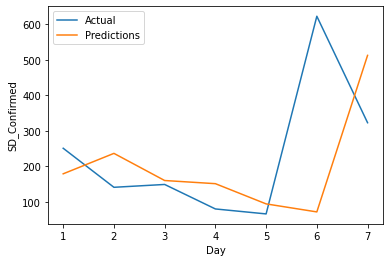

mse: 51471.50817989093
MAPE: 54.715576774558464


SC_Death
Day: 1 : Predicted: 53.8856975789405 Actual: 34
Day: 2 : Predicted: 37.9771395157881 Actual: 11
Day: 3 : Predicted: 16.395427903157618 Actual: 7
Day: 4 : Predicted: 8.879085580631523 Actual: 18
Day: 5 : Predicted: 16.175817116126304 Actual: 44
Day: 6 : Predicted: 38.43516342322526 Actual: 55
Day: 7 : Predicted: 51.68703268464505 Actual: 27




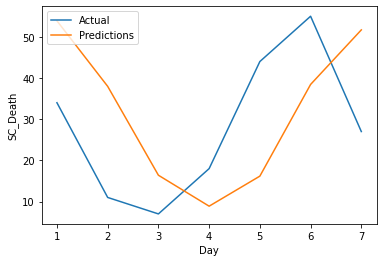

mse: 421.814388103927
MAPE: 96.2020474908816


SD_Death
Day: 1 : Predicted: 1.958782977815169 Actual: 0
Day: 2 : Predicted: 0.3917565955630337 Actual: 2
Day: 3 : Predicted: 1.6783513191126067 Actual: 0
Day: 4 : Predicted: 0.33567026382252124 Actual: 0
Day: 5 : Predicted: 0.06713405276450424 Actual: 1
Day: 6 : Predicted: 0.8134268105529009 Actual: 0
Day: 7 : Predicted: 0.16268536211058013 Actual: 3




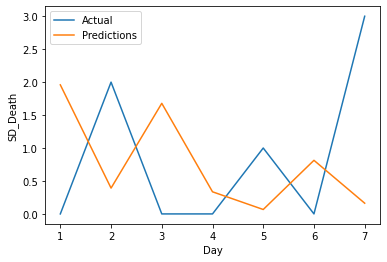

mse: 2.705010240642084
MAPE: 89.42530651390396




In [22]:
print("EWMA\nAlpha = 0.8")
print("=============\n")
print("SC_Confirmed")
print("=============")
perform_ewma_set(sc_conf_per_day_np,"SC_Confirmed",alpha = 0.8)
print("SD_Confirmed")
print("=============")
perform_ewma_set(sd_conf_per_day_np,"SD_Confirmed",alpha = 0.8)
print("SC_Death")
print("=============")
perform_ewma_set(sc_death_per_day_np,"SC_Death",alpha = 0.8)
print("SD_Death")
print("=============")
perform_ewma_set(sd_death_per_day_np,"SD_Death",alpha = 0.8)

**b. Checking how the mean of monthly COVID19 stats has changed between Feb 2021 and March 2021**

In [23]:
sc_conf_per_day_tukey_np = np.array(sc_conf_per_day_tukey)
sd_conf_per_day_tukey_np = np.array(sd_conf_per_day_tukey)
sc_death_per_day_tukey_np = np.array(sc_death_per_day_tukey)
sd_death_per_day_tukey_np = np.array(sd_death_per_day_tukey)

In [24]:
var_sc_cnf = np.var(sc_conf_per_day_tukey_np[:,1].astype(int),ddof=1)
var_sd_cnf = np.var(sd_conf_per_day_tukey_np[:,1].astype(int),ddof=1)
var_sc_dth = np.var(sc_death_per_day_tukey_np[:,1].astype(int),ddof=1)
var_sd_dth = np.var(sd_death_per_day_tukey_np[:,1].astype(int),ddof=1)

Corrected Variance is obtained for each outlier free dataset. It is used in Z-test.

In [25]:
print(var_sc_cnf,var_sc_dth,var_sd_cnf,var_sd_dth)

934817.3575336775 284.82515639481 30755.372688207142 6.682537147618387


Dataset is obtained for February. We have used np.searchsorted for positioning our data.

In [26]:
z1 = np.array(pd.to_datetime('2021-02-01'))
z2 = np.array(pd.to_datetime('2021-03-01'))
l1 = np.searchsorted(sc_conf_per_day_tukey_np[:,0], z1 , side='left')
l2  = np.searchsorted(sc_conf_per_day_tukey_np[:,0], z2 , side='left')
feb_sc_cnf = sc_conf_per_day_tukey_np[l1:l2,1].astype(int)
mean_feb_sc_cnf = np.mean(feb_sc_cnf)

l1 = np.searchsorted(sd_conf_per_day_tukey_np[:,0], z1 , side='left')
l2  = np.searchsorted(sd_conf_per_day_tukey_np[:,0], z2 , side='left')
# print(sd_conf_per_day_tukey_np[l1:l2])
feb_sd_cnf = sd_conf_per_day_tukey_np[l1:l2,1].astype(int)
mean_feb_sd_cnf = np.mean(feb_sd_cnf)

l1 = np.searchsorted(sc_death_per_day_tukey_np[:,0], z1 , side='left')
l2  = np.searchsorted(sc_death_per_day_tukey_np[:,0], z2 , side='left')
feb_sc_dth = sc_death_per_day_tukey_np[l1:l2,1].astype(int)
mean_feb_sc_dth = np.mean(feb_sc_dth)

l1 = np.searchsorted(sd_death_per_day_tukey_np[:,0], z1 , side='left')
l2  = np.searchsorted(sd_death_per_day_tukey_np[:,0], z2 , side='left')
feb_sd_dth = sd_death_per_day_tukey_np[l1:l2,1].astype(int)
mean_feb_sd_dth = np.mean(feb_sd_dth)

print(mean_feb_sc_cnf,mean_feb_sc_dth,mean_feb_sd_cnf,mean_feb_sd_dth)

2430.3076923076924 39.73913043478261 149.21428571428572 4.2


Dataset is obtained for March. We have used np.searchsorted for positioning our data.

In [27]:
z1 = np.array(pd.to_datetime('2021-03-01'))
z2 = np.array(pd.to_datetime('2021-04-01'))
l1 = np.searchsorted(sc_conf_per_day_tukey_np[:,0], z1 , side='left')
l2  = np.searchsorted(sc_conf_per_day_tukey_np[:,0], z2 , side='left')
mar_sc_cnf = sc_conf_per_day_tukey_np[l1:l2,1].astype(int)
mean_mar_sc_cnf = np.mean(mar_sc_cnf)

l1 = np.searchsorted(sd_conf_per_day_tukey_np[:,0], z1 , side='left')
l2  = np.searchsorted(sd_conf_per_day_tukey_np[:,0], z2 , side='left')
# print(sd_conf_per_day_tukey_np[l1:l2])
mar_sd_cnf = sd_conf_per_day_tukey_np[l1:l2,1].astype(int)
mean_mar_sd_cnf = np.mean(mar_sd_cnf)

l1 = np.searchsorted(sc_death_per_day_tukey_np[:,0], z1 , side='left')
l2  = np.searchsorted(sc_death_per_day_tukey_np[:,0], z2 , side='left')
mar_sc_dth = sc_death_per_day_tukey_np[l1:l2,1].astype(int)
mean_mar_sc_dth = np.mean(mar_sc_dth)

l1 = np.searchsorted(sd_death_per_day_tukey_np[:,0], z1 , side='left')
l2  = np.searchsorted(sd_death_per_day_tukey_np[:,0], z2 , side='left')
mar_sd_dth = sd_death_per_day_tukey_np[l1:l2,1].astype(int)
mean_mar_sd_dth = np.mean(mar_sd_dth)

print(mean_mar_sc_cnf,mean_mar_sc_dth,mean_mar_sd_cnf,mean_mar_sd_dth)

1122.8387096774193 19.483870967741936 178.86666666666667 1.5161290322580645


Below is the definition for wald, Z-test, T-test, wald two population and T-test for two population hypothesis tests.

In [28]:
def wald(theta, theta_0, Z_alphaby2):
  theta_cap = np.mean(theta)
  se_cap = np.sqrt(np.mean(theta)/theta.shape[0])#corrected variance estimator
  wald = (theta_cap - theta_0)/se_cap
  print(wald)
  return np.abs(wald)<=Z_alphaby2
def wald2pop(theta_X,theta_Y,Z_alphaby2):
  var_cap_X, var_cap_Y = np.mean(theta_X), np.mean(theta_Y)
  se_cap = np.sqrt((var_cap_X/theta_X.shape[0]) + (var_cap_Y/theta_Y.shape[0]))
  delta_cap = np.mean(theta_X) - np.mean(theta_Y)
  wald = delta_cap/se_cap
  print(wald)
  return np.abs(wald)<=Z_alphaby2
def Z_test(theta, theta_0, se, Z_alphaby2):
  theta_bar = np.mean(theta)
  Z = (theta_bar - theta_0)/(se/np.sqrt(len(theta)))
  print(Z)
  return np.abs(Z)<=Z_alphaby2
def t_test(theta, theta_0, thr):
  print("threshold used: t",len(theta)-1,"alpha/2")
  theta_bar = np.mean(theta)
  se_cap = np.sqrt(np.var(theta,ddof=1))
  t = (theta_bar - theta_0)/(se_cap/np.sqrt(len(theta)))
  print(t)
  return np.abs(t)<=thr
def t_test_2pop(theta_X,theta_Y,thr):
  print("threshold used: t",len(theta_X)+len(theta_Y)-2,"alpha/2")
  var_cap_X, var_cap_Y = np.var(theta_X,ddof=1), np.var(theta_Y,ddof=1)
  se_cap = np.sqrt((var_cap_X/theta_X.shape[0]) + (var_cap_Y/theta_Y.shape[0]))
  delta_cap = np.mean(theta_X) - np.mean(theta_Y)
  t = delta_cap/se_cap
  print(t)
  return np.abs(t)<=thr

In [29]:
print("wald test for mar_sc_cnf with mean_feb_sc_cnf and Z_alphaby2 = 1.96")
print("Accept" if (wald(mar_sc_cnf,mean_feb_sc_cnf,Z_alphaby2 = 1.96)==True) else "Reject")
print("wald test for mar_sd_cnf with mean_feb_sd_cnf and Z_alphaby2 = 1.96")
print("Accept" if (wald(mar_sd_cnf,mean_feb_sd_cnf,Z_alphaby2 = 1.96)==True) else "Reject")

print("wald test for mar_sc_dth with mean_feb_sc_dth and Z_alphaby2 = 1.96")
print("Accept" if (wald(mar_sc_dth,mean_feb_sc_dth,Z_alphaby2 = 1.96)==True) else "Reject")
print("wald test for mar_sd_dth with mean_feb_sd_dth and Z_alphaby2 = 1.96")
print("Accept" if (wald(mar_sd_dth,mean_feb_sd_dth,Z_alphaby2 = 1.96)==True) else "Reject")

wald test for mar_sc_cnf with mean_feb_sc_cnf and Z_alphaby2 = 1.96
-217.24688273326123
Reject
wald test for mar_sd_cnf with mean_feb_sd_cnf and Z_alphaby2 = 1.96
12.143824759349986
Reject
wald test for mar_sc_dth with mean_feb_sc_dth and Z_alphaby2 = 1.96
-25.549419394724097
Reject
wald test for mar_sd_dth with mean_feb_sd_dth and Z_alphaby2 = 1.96
-12.135967292624827
Reject


In [30]:
print("Z_test test for mar_sc_cnf with mean_feb_sc_cnf and Z_alphaby2 = 1.96")
print("Accept" if (Z_test(mar_sc_cnf,mean_feb_sc_cnf,np.sqrt(var_sc_cnf),Z_alphaby2 = 1.96)==True) else "Reject")
print("Z_test test for mar_sd_cnf with mean_feb_sd_cnf and Z_alphaby2 = 1.96")
print("Accept" if (Z_test(mar_sd_cnf,mean_feb_sd_cnf,np.sqrt(var_sd_cnf),Z_alphaby2 = 1.96)==True) else "Reject")

print("Z_test test for mar_sc_dth with mean_feb_sc_dth and Z_alphaby2 = 1.96")
print("Accept" if (Z_test(mar_sc_dth,mean_feb_sc_dth,np.sqrt(var_sc_dth),Z_alphaby2 = 1.96)==True) else "Reject")
print("Z_test test for mar_sd_dth with mean_feb_sd_dth and Z_alphaby2 = 1.96")
print("Accept" if (Z_test(mar_sd_dth,mean_feb_sd_dth,np.sqrt(var_sd_dth),Z_alphaby2 = 1.96)==True) else "Reject")

Z_test test for mar_sc_cnf with mean_feb_sc_cnf and Z_alphaby2 = 1.96
-7.529200421273575
Reject
Z_test test for mar_sd_cnf with mean_feb_sd_cnf and Z_alphaby2 = 1.96
0.9261038748306993
Accept
Z_test test for mar_sc_dth with mean_feb_sc_dth and Z_alphaby2 = 1.96
-6.68235410237649
Reject
Z_test test for mar_sd_dth with mean_feb_sd_dth and Z_alphaby2 = 1.96
-5.780584959369736
Reject


In [31]:
print("t_test test for mar_sc_cnf with mean_feb_sc_cnf and Threshold = 2.042")
print("Accept" if (t_test(mar_sc_cnf,mean_feb_sc_cnf,thr = 2.042)==True) else "Reject")
print("t_test test for mar_sd_cnf with mean_feb_sd_cnf and Threshold = 2.045")
print("Accept" if (t_test(mar_sd_cnf,mean_feb_sd_cnf,thr = 2.045)==True) else "Reject")

print("t_test test for mar_sc_dth with mean_feb_sc_dth and Threshold = 2.042")
print("Accept" if (t_test(mar_sc_dth,mean_feb_sc_dth,thr = 2.042)==True) else "Reject")
print("t_test test for mar_sd_dth with mean_feb_sd_dth and Threshold = 2.042")
print("Accept" if (t_test(mar_sd_dth,mean_feb_sd_dth,thr = 2.042)==True) else "Reject")

t_test test for mar_sc_cnf with mean_feb_sc_cnf and Threshold = 2.042
threshold used: t 30 alpha/2
-22.1752363552327
Reject
t_test test for mar_sd_cnf with mean_feb_sd_cnf and Threshold = 2.045
threshold used: t 29 alpha/2
1.2846733174201763
Accept
t_test test for mar_sc_dth with mean_feb_sc_dth and Threshold = 2.042
threshold used: t 30 alpha/2
-7.719023695419868
Reject
t_test test for mar_sd_dth with mean_feb_sd_dth and Threshold = 2.042
threshold used: t 30 alpha/2
-8.737747724334783
Reject


In [32]:
print("t_test_2pop test for mar_sc_cnf with feb_sc_cnf and Threshold = 2.004")
print("Accept" if (t_test_2pop(mar_sc_cnf,feb_sc_cnf,thr = 2.004)==True) else "Reject")
print("t_test_2pop test for mar_sd_cnf with feb_sd_cnf and Threshold = 2.003")
print("Accept" if (t_test_2pop(mar_sd_cnf,feb_sd_cnf,thr = 2.003)==True) else "Reject")

print("t_test_2pop test for mar_sc_dth with feb_sc_dth and Threshold = 2.007")
print("Accept" if (t_test_2pop(mar_sc_dth,feb_sc_dth,thr = 2.007)==True) else "Reject")
print("t_test_2pop test for mar_sd_dth with feb_sd_dth and Threshold = 2.005")
print("Accept" if (t_test_2pop(mar_sd_dth,feb_sd_dth,thr = 2.005)==True) else "Reject")

t_test_2pop test for mar_sc_cnf with feb_sc_cnf and Threshold = 2.004
threshold used: t 55 alpha/2
-8.74116865967289
Reject
t_test_2pop test for mar_sd_cnf with feb_sd_cnf and Threshold = 2.003
threshold used: t 56 alpha/2
0.8998316343566365
Accept
t_test_2pop test for mar_sc_dth with feb_sc_dth and Threshold = 2.007
threshold used: t 52 alpha/2
-4.5055413850181845
Reject
t_test_2pop test for mar_sd_dth with feb_sd_dth and Threshold = 2.005
threshold used: t 54 alpha/2
-2.4524000953385863
Reject


In [33]:
print("wald2pop test for mar_sc_cnf with feb_sc_cnf and Z_alphaby2 = 1.96")
print("Accept" if (wald2pop(mar_sc_cnf,feb_sc_cnf,Z_alphaby2 = 1.96)==True) else "Reject")
print("wald2pop test for mar_sd_cnf with feb_sd_cnf and Z_alphaby2 = 1.96")
print("Accept" if (wald2pop(mar_sd_cnf,feb_sd_cnf,Z_alphaby2 = 1.96)==True) else "Reject")

print("wald2pop test for mar_sc_dth with feb_sc_dth and Z_alphaby2 = 1.96")
print("Accept" if (wald2pop(mar_sc_dth,feb_sc_dth,Z_alphaby2 = 1.96)==True) else "Reject")
print("wald2pop test for mar_sd_dth with feb_sd_dth and Z_alphaby2 = 1.96")
print("Accept" if (wald2pop(mar_sd_dth,feb_sd_dth,Z_alphaby2 = 1.96)==True) else "Reject")

wald2pop test for mar_sc_cnf with feb_sc_cnf and Z_alphaby2 = 1.96
-114.8078256762813
Reject
wald2pop test for mar_sd_cnf with feb_sd_cnf and Z_alphaby2 = 1.96
8.824447499883284
Reject
wald2pop test for mar_sc_dth with feb_sc_dth and Z_alphaby2 = 1.96
-13.195398076278138
Reject
wald2pop test for mar_sd_dth with feb_sd_dth and Z_alphaby2 = 1.96
-5.762679416372183
Reject


**Check and comment on whether the tests are applicable or not**

1. Wald's test: The wald test seems applicable.
2. Z-Test: The Z-test seems most applicable as it is considering true se.
3. T-test: The T-test does not seem to be applicable as #death and #cases are not normally distributed. Its tempting that the no. of datapoints are less but t-test is still not applicable.

**2 c. Infer the equality of distributions in the two states**<br>
(i) 1-population KS test (poisson, geometric, binomial)<br>
(ii) 2-population KS test<br>
(iii) Permutation test

As we want to infer the equality only for last 3 months of 2020 (Oct, Nov, Dec)
We first create 4 dataframes with data only in the concerned range.
For this we use the outlier removed data first

In [34]:
mask_1 = (sc_conf_per_day_tukey['Date'] > '2020-9-30') & (sc_conf_per_day_tukey['Date'] < '2021-1-1')
sc_conf_per_day_ = sc_conf_per_day_tukey.loc[mask_1]
len(sc_conf_per_day_)

86

Here we can see, for SD confirmed data, due to outlier removal, very less data was left, so we are using the original data (per day) instead.

In [35]:
mask_2 = (sd_conf_per_day_tukey['Date'] > '2020-9-30') & (sd_conf_per_day_tukey['Date'] < '2021-1-1')
sd_conf_per_day_ = sd_conf_per_day_tukey.loc[mask_2]
print("Length of outlier removed data", len(sd_conf_per_day_))

#using non tukey removed data as very less data
mask_2 = (sd_conf_per_day['Date'] > '2020-9-30') & (sd_conf_per_day['Date'] < '2021-1-1')
sd_conf_per_day_ = sd_conf_per_day.loc[mask_2]
len(sd_conf_per_day_)

Length of outlier removed data 40


91

In [36]:
mask_3 = (sc_death_per_day_tukey['Date'] > '2020-9-30') & (sc_death_per_day_tukey['Date'] < '2021-1-1')
sc_death_per_day_ = sc_death_per_day_tukey.loc[mask_3]
len(sc_death_per_day_)

89

Here we can see, for SD deaths data, due to outlier removal, very less data was left, so we are using the original data (per day) instead.

In [37]:
mask_4 = (sd_death_per_day_tukey['Date'] > '2020-9-30') & (sd_death_per_day_tukey['Date'] < '2021-1-1')
sd_death_per_day_ = sd_death_per_day_tukey.loc[mask_4]
print("Length of outlier removed data", len(sd_death_per_day_))

#using non tukey removed data as very less data
mask_4 = (sd_death_per_day['Date'] > '2020-9-30') & (sd_death_per_day['Date'] < '2021-1-1')
sd_death_per_day_ = sd_death_per_day.loc[mask_4]
len(sd_death_per_day_)

Length of outlier removed data 51


92

In [38]:
def calculate_sample_mean(X):
    return sum(X) / len(X)


def calculate_estimated_second_moment(X):
    return sum([x * x for x in X]) / len(X)

Using threshold as 0.05 for both tests

In [39]:
threshold = 0.05

KS TEST

In [40]:
def get_ecdf(X):
    c = [None] * len(X)
    for i in reversed(range(len(X))):
        if i < len(X) - 1 and X[i] == X[i + 1]:
            c[i] = c[i + 1]
        else:
            c[i] = (i + 1) / len(X)
        
    return c

1-population KS test

In [41]:
from scipy.stats import poisson, geom, binom

In [42]:
def get_MME_params(X, dist):
    sample_mean = calculate_sample_mean(X)
    if dist == "poisson":
        return sample_mean, None
    elif dist == "geometric":
        return 1 / sample_mean, None
    elif dist == "binomial":
        sample_sec_mom = calculate_estimated_second_moment(X)
        t1 = sample_mean ** 2
        t2 = sample_mean - sample_sec_mom + t1
        return t1 / t2, t2 / sample_mean
    else:
        return None, None

    
def get_true_cdf(X, dist, param1, param2):
    c = [None] * len(X)
    if dist == "poisson":
        print("Poisson dist with lambda =", param1)
        for i in range(len(X)):
            c[i] = poisson.cdf(X[i], param1)
    elif dist == "geometric":
        print("Geometric dist with p =", param1)
        for i in range(len(X)):
            c[i] = geom.cdf(X[i], param1)
    elif dist == "binomial":
        print("Binomial dist with n =", param1, "p =", param2)
        for i in range(len(X)):
            c[i] = binom.cdf(X[i], param1, param2)
    return c

In [43]:
def get_ecdf_minus_vals(eCDF):
    return [0] + eCDF[:-1]


def get_ecdf_plus_vals(eCDF):
    return eCDF

1 population KS test for SC confirmed and SD confirmed with poisson as true distribution
Poisson dist with lambda = 1485.1627906976744
true cdf range 0.0 1.0
KS statistic = 0.8848520997021351
Max value at x = 1387 with values [0.005257790407755003, 0.8901098901098901]
We Reject the Null Hypothesis: SC confirmed and SD confirmed does NOT have the same distribution


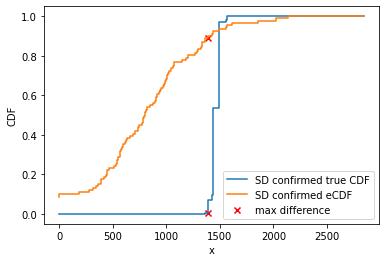



1 population KS test for SC deaths and SD deaths with poisson as true distribution
Poisson dist with lambda = 18.662921348314608
true cdf range 7.848673123327148e-09 1.0
KS statistic = 0.5354961058052318
Max value at x = 11 with values [0.04059085071650736, 0.5760869565217391]
We Reject the Null Hypothesis: SC deaths and SD deaths does NOT have the same distribution


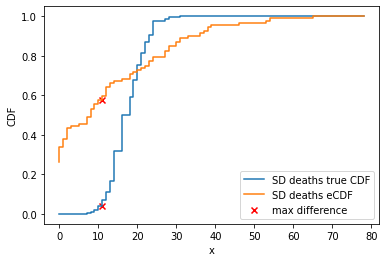



1 population KS test for SC confirmed and SD confirmed with geometric as true distribution
Geometric dist with p = 0.0006733268610441264
true cdf range 0.0 0.8526453509910681
KS statistic = 0.29391366781914063
Max value at x = 1611 with values [0.6621302882248155, 0.9560439560439561]
We Reject the Null Hypothesis: SC confirmed and SD confirmed does NOT have the same distribution


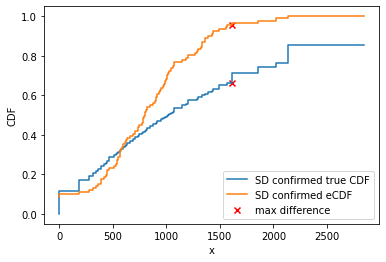



1 population KS test for SC deaths and SD deaths with geometric as true distribution
Geometric dist with p = 0.05358217940999398
true cdf range 0.0 0.986370908046822
KS statistic = 0.28337434232913644
Max value at x = 1 with values [0.05358217940999398, 0.33695652173913043]
We Reject the Null Hypothesis: SC deaths and SD deaths does NOT have the same distribution


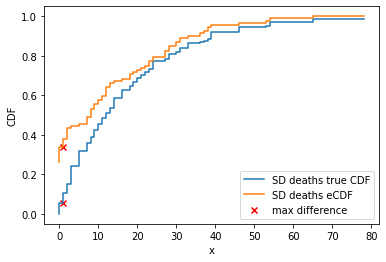



1 population KS test for SC confirmed and SD confirmed with binomial as true distribution
Binomial dist with n = -2.0403501030428166 p = -727.8960549382285
true cdf range 1.0 1.0
KS statistic = 1.0
Max value at x = 0 with values [1.0, 0]
We Reject the Null Hypothesis: SC confirmed and SD confirmed does NOT have the same distribution


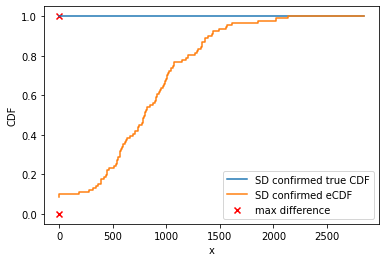



1 population KS test for SC deaths and SD deaths with binomial as true distribution
Binomial dist with n = -1.915075525827884 p = -9.745266490336803
true cdf range 1.0 1.0
KS statistic = 1.0
Max value at x = 0 with values [1.0, 0]
We Reject the Null Hypothesis: SC deaths and SD deaths does NOT have the same distribution


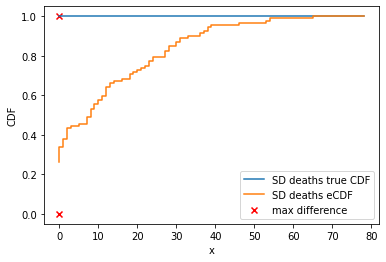

In [44]:
def perform_1_pop_KS(X, Y, X_label, Y_label, dist):
    print("1 population KS test for", X_label, "and", Y_label, "with", dist, "as true distribution")
    
    # Obtain MME parameters from data of first state
    param1, param2 = get_MME_params(X, dist)
    
    # Using the MME parameters obtained on data of second state
    Y.sort()
    
    n = len(Y)

    true_cdfs_Y = get_true_cdf(Y, dist, param1, param2)
    print("true cdf range", true_cdfs_Y[0], true_cdfs_Y[-1])
    
    ecdf_Y = get_ecdf(Y)
    e_minus = get_ecdf_minus_vals(ecdf_Y)
    e_plus = get_ecdf_plus_vals(ecdf_Y)

    d = -1
    max_diff_idx = 0
    max_diff_vals = [None, None]
    for i in range(n):
        true_minus_diff = abs(true_cdfs_Y[i] - e_minus[i])
        true_plus_diff = abs(true_cdfs_Y[i] - e_plus[i])
        if d < true_minus_diff:
            max_diff_idx = i
            max_diff_vals[0] = true_cdfs_Y[i]
            max_diff_vals[1] = e_minus[i]
            d = true_minus_diff
        if d < true_plus_diff:
            max_diff_idx = i
            max_diff_vals[0] = true_cdfs_Y[i]
            max_diff_vals[1] = e_plus[i]
            d = true_plus_diff

    print("KS statistic =", d)

    print("Max value at x =", Y[max_diff_idx], "with values", max_diff_vals)

    if d >= threshold:
        print("We Reject the Null Hypothesis:", X_label, "and", Y_label, "does NOT have the same distribution")
    else:
        print("We Accept the Null Hypothesis:", X_label, "and", Y_label, "have the same distribution")
        
    plt.xlabel("x")
    plt.ylabel('CDF')
    
    X_len = len(X)
    Y_len = len(Y)
    
    plt.step(Y, true_cdfs_Y, label=Y_label+" true CDF")
    plt.step(Y, ecdf_Y, label=Y_label+" eCDF")
    plt.scatter([Y[max_diff_idx], Y[max_diff_idx]], max_diff_vals, color='red', marker='x', label='max difference')
#     plt.scatter(Y, [0] * n, color='blue', marker='x', label=Y_label)
    plt.legend()
    plt.show()


distributions = ["poisson", "geometric", "binomial"]
for i in range(len(distributions)):
    perform_1_pop_KS(sc_conf_per_day_.loc[:, "SC confirmed"].values, 
                     sd_conf_per_day_.loc[:, "SD confirmed"].values, 
                     "SC confirmed", "SD confirmed", distributions[i])
    print("\n")
    perform_1_pop_KS(sc_death_per_day_.loc[:, "SC deaths"].values, 
                     sd_death_per_day_.loc[:, "SD deaths"].values, 
                     "SC deaths", "SD deaths", distributions[i])
    print("\n")


2-population KS Test

In [45]:
def get_ecdf_val_minus(X, eCDF, x):
    for i in range(len(X)):
        if X[i] >= x:
            if i == 0:
                return 0
            else:
                return eCDF[i - 1]
    return 1


def get_ecdf_val_plus(X, eCDF, x):
    for i in range(len(X)):
        if X[i] == x:
            return eCDF[i]
        elif X[i] > x:
            if i == 0:
                return 0
            else:
                return eCDF[i - 1]
    return 1

2 population KS test for SC confirmed and SD confirmed
X len 86
Y len 91
X_eCDF len 86
Y_eCDF len 91
KS statistic = 0.3067978533094813
Max value at x = 1493 with values [0.6162790697674418, 0.9230769230769231]
We Reject the Null Hypothesis: SC confirmed and SD confirmed does NOT have the same distribution


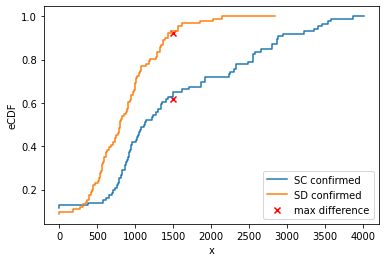



2 population KS test for SC deaths and SD deaths
X len 89
Y len 92
X_eCDF len 89
Y_eCDF len 92
KS statistic = 0.2774792379091353
Max value at x = 3 with values [0.15730337078651685, 0.43478260869565216]
We Reject the Null Hypothesis: SC deaths and SD deaths does NOT have the same distribution


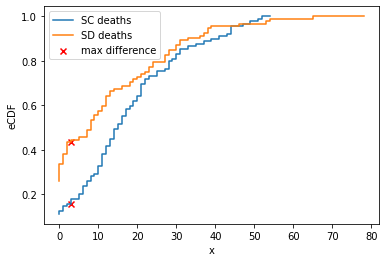

In [46]:
def perform_2_pop_KS(X, Y, X_label, Y_label):
    print("2 population KS test for", X_label, "and", Y_label)

    X.sort()
    Y.sort()

    X_len = len(X)
    Y_len = len(Y)
    
    if X_len > Y_len:
        t = Y
        Y = X
        X = t
        X_len = len(X)
        Y_len = len(Y)
        t = X_label
        X_label = Y_label
        Y_label = t

    print("X len", X_len)
    print("Y len", Y_len)
    
    X_eCDF = get_ecdf(X)
    Y_eCDF = get_ecdf(Y)
    print("X_eCDF len", len(X_eCDF))
    print("Y_eCDF len", len(Y_eCDF))

    d = -1
    max_diff_idx = 0
    max_diff_vals = [None, None]
    for i in range(X_len):
        x_plus_y_plus_diff = abs(get_ecdf_val_plus(X, X_eCDF, X[i]) - get_ecdf_val_plus(Y, Y_eCDF, X[i]))
        x_minus_y_minus_diff = abs(get_ecdf_val_minus(X, X_eCDF, X[i]) - get_ecdf_val_minus(Y, Y_eCDF, X[i]))
        if d < x_plus_y_plus_diff:
            max_diff_idx = i
            max_diff_vals[0] = get_ecdf_val_plus(X, X_eCDF, X[i])
            max_diff_vals[1] = get_ecdf_val_plus(Y, Y_eCDF, X[i])
            d = x_plus_y_plus_diff
        if d < x_minus_y_minus_diff:
            max_diff_idx = i
            max_diff_vals[0] = get_ecdf_val_minus(X, X_eCDF, X[i])
            max_diff_vals[1] = get_ecdf_val_minus(Y, Y_eCDF, X[i])
            d = x_minus_y_minus_diff

    print("KS statistic =", d)

    print("Max value at x =", X[max_diff_idx], "with values", max_diff_vals)

    if d >= threshold:
        print("We Reject the Null Hypothesis:", X_label, "and", Y_label, "does NOT have the same distribution")
    else:
        print("We Accept the Null Hypothesis:", X_label, "and", Y_label, "have the same distribution")
        
    plt.xlabel("x")
    plt.ylabel('eCDF')
    
    X_len = len(X)
    Y_len = len(Y)
    
    plt.step(X, X_eCDF, label=X_label)
    plt.step(Y, Y_eCDF, label=Y_label)
    plt.scatter([X[max_diff_idx], X[max_diff_idx]], max_diff_vals, color='red', marker='x', label='max difference')
    plt.legend()
    plt.show()


perform_2_pop_KS(sc_conf_per_day_.loc[:, "SC confirmed"].values, 
                 sd_conf_per_day_.loc[:, "SD confirmed"].values, 
                 "SC confirmed", "SD confirmed")
print("\n")
perform_2_pop_KS(sc_death_per_day_.loc[:, "SC deaths"].values, 
                 sd_death_per_day_.loc[:, "SD deaths"].values, 
                 "SC deaths", "SD deaths")
print("\n")


Permutation Test

In [47]:
from numpy.random import default_rng
rng = default_rng()

In [48]:
def calculate_T(D, X_len, Y_len):
    X_mean = sum(D[0:X_len]) / X_len
    Y_mean = sum(D[X_len:]) / Y_len
    return abs(X_mean - Y_mean)


def get_p_value(D, X_len, Y_len, n, T_obs):
    sampled_data = []
    while len(sampled_data) != n:
        perm = rng.permutation(D).tolist()
        if perm in sampled_data:
            continue
        else:
            sampled_data.append(perm)
            
    count = 0
    for i in range(n):
        if calculate_T(sampled_data[i], X_len, Y_len) > T_obs:
            count = count + 1
    
    return count / n

In [49]:
def perfrom_permutation_test(X, Y, X_label, Y_label):
    print("Permutation test for", X_label, "and", Y_label)
    
    X_len = len(X)
    Y_len = len(Y)

    D = np.append(X, Y)
    T_obs = calculate_T(D, X_len, Y_len)
    print("X len =", X_len)
    print("Y len =", Y_len)
    print("T observed =", T_obs)

    p_val2 = get_p_value(D, X_len, Y_len, 1000, T_obs)
    print("For n = 1000, p value is", p_val2)
    if p_val2 <= threshold:
        print("We Reject the Null Hypothesis:", X_label, "and", Y_label, "does NOT have the same distribution")
    else:
        print("We Accept the Null Hypothesis:", X_label, "and", Y_label, "have the same distribution")


perfrom_permutation_test(sc_conf_per_day_.loc[:, "SC confirmed"].values, 
                 sd_conf_per_day_.loc[:, "SD confirmed"].values, 
                 "SC confirmed", "SD confirmed")
print("\n")
perfrom_permutation_test(sc_death_per_day_.loc[:, "SC deaths"].values, 
                 sd_death_per_day_.loc[:, "SD deaths"].values, 
                 "SC deaths", "SD deaths")
print("\n")


Permutation test for SC confirmed and SD confirmed
X len = 86
Y len = 91
T observed = 639.5034500383338
For n = 1000, p value is 0.0
We Reject the Null Hypothesis: SC confirmed and SD confirmed does NOT have the same distribution


Permutation test for SC deaths and SD deaths
X len = 89
Y len = 92
T observed = 4.912921348314608
For n = 1000, p value is 0.036
We Reject the Null Hypothesis: SC deaths and SD deaths does NOT have the same distribution




Question 2.d.

- sc_conf_per_day_tukey and sd_conf_per_day_tukey dataframes contain the daily cases data for the two states with outliers removed. An inner join is used to to merge the tables for the common dates to give conf_combined


In [50]:
conf_combined = pd.merge(sc_conf_per_day_tukey, sd_conf_per_day_tukey, on='Date', how='inner')
conf_combined

,Date,SC confirmed,SD confirmed
0,2020-01-22,0,0
1,2020-01-23,0,0
2,2020-01-24,0,0
3,2020-01-25,0,0
4,2020-01-26,0,0
...,...,...,...
354,2021-03-30,600,143
355,2021-03-31,961,266
356,2021-04-01,1091,230
357,2021-04-02,1315,198


- Here, we find the index in the dataframe where date='June 1st 2020' is situated. Since we need 8 weeks worth of data, we initialize the last_date_index such that it can be used to fetch 56 days data
- First date index: Index of Date='1st June 2020' 
- Last date index: Index of last day for required data (last day of 8th week)

In [51]:
idx = conf_combined.index
first_date_index = idx[conf_combined["Date"] == "2020-06-01"][0]
last_date_index = first_date_index + 7*8

- The conf_combined dataframe has 3 columns ['date', 'sc_conf', 'sd_conf']. Since we need total cases for both states combined, we add the values for each day and assign it to new numpy array conf_final

In [52]:
conf_combined_np = np.array(conf_combined)
conf_final = np.zeros((359, 2), dtype=np.object)
conf_final[:, 0] = conf_combined_np[:, 0]
conf_final[:, 1] = conf_combined_np[:, 1] + conf_combined_np[:, 2]

- Here, we filter for the required 8 weeks data, using the variables 'first_date_index' and 'last_date_index'

In [53]:
conf_required_data = conf_final[first_date_index:last_date_index]

- Finally, we plot the posterior using the given prior 
- The prior is given as exponential whose parameter, $\beta$ is calculated as $\beta = \lambda_{MME} = \sum_{i=1}^{28} x_i$, where $x_i$ is cases for ith day
- This gives us the prior,
$$ Exp(1/ \beta) = 1 / \beta * e^{x/ \beta }$$
- We are also given likelihood of the data which is Poisson
- Then, posterior for fifth week is calculated as 
$$ Posterior_{1} \propto Likelihood * prior $$
- Therefore, for any $ith$ week where $i \ge 1$
$$ Posterior_{i} \propto \lambda^{a}*e^{-b\lambda} $$
where
$$ n = 7*i $$
$$ a = \sum_{j=0}^n x_i $$ 
$$ b = 1/(n + 1/\beta)$$

Week 5: 
Alpha: 11878, Scale: 0.14283236170568667
MAP: 1696.4199897511935
Week 5: 
Alpha: 24082, Scale: 0.07142237560331849
MAP: 1719.9221527067161
Week 5: 
Alpha: 37769, Scale: 0.047616293839312825
MAP: 1798.3721941718466
Week 5: 
Alpha: 49349, Scale: 0.03571273669079013
MAP: 1762.3520808921019


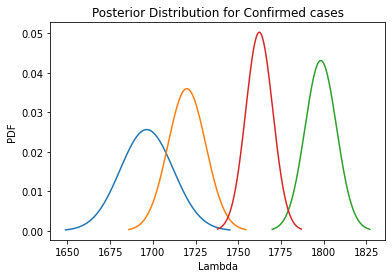

In [54]:
from scipy import stats
import matplotlib.pyplot as plt


four_weeks_data = conf_required_data[:28]

# Calculating beta for prior distribution, as sample mean of first four weeks of data
beta = sum(four_weeks_data[:, 1])/28

a = 0
for i in range(4):
  # Fetch weeks data
  week_data = conf_required_data[28+7*i:28+7*(i+1)]

  # Calculate number of days to consider in the new posterior
  n = 7*(i+1)

  # set paramters for gamma distribution
  a = a + sum(week_data[:, 1])
  b = 1./(n + 1./beta)

  print("Week 5: ")
  print("Alpha: {}, Scale: {}".format(str(a), str(b)))

  #get the least and maximum possible x axis value for distribution
  x1 = np.linspace(stats.gamma.ppf(0.001, a=a, scale=b), stats.gamma.ppf(0.999, a=a, scale=b), 100000)

  # get pdf for gamma using paramters a and b
  y1 = stats.gamma.pdf(x1, a=a, scale=b)

  # get MAP
  index_map = np.argmax(y1)
  map = x1[index_map]
  print("MAP: {}".format(str(map)))

  # plot the PDF
  plt.plot(x1, y1)
  plt.title("Posterior Distribution for Confirmed cases")
  plt.xlabel('Lambda')
  plt.ylabel('PDF')
plt.show()

- sc_death_per_day_tukey and sd_death_per_day_tukey dataframes contain the daily death data for the two states with outliers removed. An inner join is used to to merge the tables for the common dates to give death_combined

In [55]:
death_combined = pd.merge(sc_death_per_day_tukey, sd_death_per_day_tukey, on='Date', how='inner')
death_combined

,Date,SC deaths,SD deaths
0,2020-01-22,0,0
1,2020-01-23,0,0
2,2020-01-24,0,0
3,2020-01-25,0,0
4,2020-01-26,0,0
...,...,...,...
363,2021-03-30,4,2
364,2021-03-31,20,0
365,2021-04-01,27,3
366,2021-04-02,7,9


- Here, we find the index in the dataframe where date='June 1st 2020' is situated. Since we need 8 weeks worth of data, we initialize the last_date_index such that it can be used to fetch 56 days data
- First date index: Index of Date='1st June 2020' 
- Last date index: Index of last day for required data (last day of 8th week)

In [56]:
idx = death_combined.index
first_date_index = idx[death_combined["Date"] == "2020-06-01"][0]
last_date_index = first_date_index + 7*8

- The conf_combined dataframe has 3 columns ['date', 'sc_death', 'sd_death']. Since we need total deaths for both states combined, we add the values for each day and assign it to new numpy array death_final

In [57]:
death_combined_np = np.array(death_combined)
death_final = np.zeros((368, 2), dtype=np.object)
death_final[:, 0] = death_combined_np[:, 0]
death_final[:, 1] = death_combined_np[:, 1] + death_combined_np[:, 2]

- Filtering for 8 weeks worth of data

In [58]:
death_required_data = death_final[first_date_index:last_date_index]

- Finally, we plot the posterior using the given prior 
- The prior is given as exponential whose parameter, $\beta$ is calculated as $\beta = \lambda_{MME} = \sum_{i=1}^{28} x_i$, where $x_i$ is death for ith day
- This gives us the prior,
$$ Exp(1/ \beta) = 1 / \beta * e^{x/ \beta }$$
- We are also given likelihood of the data which is Poisson
- Then, posterior for fifth week is calculated as 
$$ Posterior_{1} \propto Likelihood * prior $$
- Therefore, for any $ith$ week where $i \ge 1$
$$ Posterior_{i} \propto \lambda^{a}*e^{-b\lambda} $$
where
$$ n = 7*i $$
$$ a = \sum_{j=0}^n x_i $$ 
$$ b = 1/(n + 1/\beta)$$

Week 5: 
Alpha: 108, Scale: 0.14059853190287974
MAP: 15.044007045842026
Week 5: 
Alpha: 256, Scale: 0.07085941946499716
MAP: 18.069148886872338
Week 5: 
Alpha: 453, Scale: 0.04736541753852007
MAP: 21.409169042896576
Week 5: 
Alpha: 699, Scale: 0.035571428571428566
MAP: 24.828853163378398


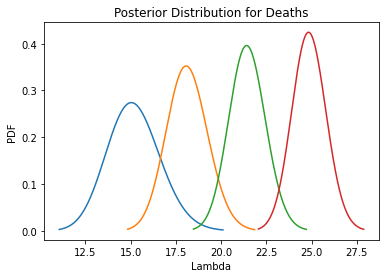

In [59]:
from scipy import stats
import matplotlib.pyplot as plt

four_weeks_data = death_required_data[:28]

# find paramter for prior using first four weeks for calculating sample mean
beta = sum(four_weeks_data[:, 1])/28

a = 0
for i in range(4):
  # fetch week data
  week_data = death_required_data[28+7*i:28+7*(i+1)]
  n = 7*(i+1)

  # calculate paramters for gamma distribution
  a = a + sum(week_data[:, 1])
  b = 1./(n + 1./beta)
  print("Week 5: ")
  print("Alpha: {}, Scale: {}".format(str(a), str(b)))

  # get x and y(pdf) values for plotting the gamma distribution
  x1 = np.linspace(stats.gamma.ppf(0.001, a=a, scale=b), stats.gamma.ppf(0.999, a=a, scale=b), 100000)
  y1 = stats.gamma.pdf(x1, a=a, scale=b)

  # Get Map by indexing for x-axis value pertaining to max pdf value
  index_map = np.argmax(y1)
  map = x1[index_map]
  print("MAP: {}".format(str(map)))

  plt.plot(x1, y1)
  plt.title("Posterior Distribution for Deaths")
  plt.xlabel('Lambda')
  plt.ylabel('PDF')
plt.show()

Question. 3
**Exploratory Section**